In [1]:
import numpy as np
import glob, os, json
import pickle

import matplotlib.pyplot as plt
import corner
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import multiprocessing as mp

import os, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import healpy as hp
import time
import scipy
from scipy import integrate as spint

import skyplot_tools as spt
from corner import corner

from astropy.time import Time
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize


from enterprise.pulsar import Pulsar

from la_forge.core import Core
from la_forge.diagnostics import plot_chains

nano12_pkl = '/home/nima/nanograv/12p5yr_bwm/channelized_12yr_v3_partim_py3.pkl'
with open(nano12_pkl, 'rb') as f:
    allpsrs=pickle.load(f)

In [2]:
def figsize(scale):
    fig_width_pt = 513.17 #469.755                  # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    #golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    golden_mean= 0.3333
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size
plt.rcParams.update(plt.rcParamsDefault)

params = {'backend': 'pdf',
        'axes.labelsize': 10,
        'lines.markersize': 4,
        'font.size': 10,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.2,
        'legend.fontsize': 7,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.family': 'serif',
        #'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        'figure.figsize': figsize(0.98)}

plt.rcParams.update(params)

/home/nima/anaconda3/envs/nano15/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


# Figure 1: Detection

In [3]:
# the chaindir ought to be where you have the Bayesian MCMC chain 
chaindir = '/home/nima/nanograv/12p5yr_bwm/full_PTA_bayesian_detection_extra_no_early/'
core = Core(chaindir=chaindir, label='',)

In [4]:
# Let's mask out the part of the chains that's before 53750
t0s = core.get_param('bwm_t0', to_burn=False)
mask=np.zeros(len(t0s),dtype=bool)

for t0_idx, t0 in enumerate(t0s):
    if t0 > 53750:
        mask[t0_idx] = True
    else:
        mask[t0_idx] = False

core.chain = core.chain[mask, :]

/home/nima/anaconda3/envs/nano15/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


(47933, 3)


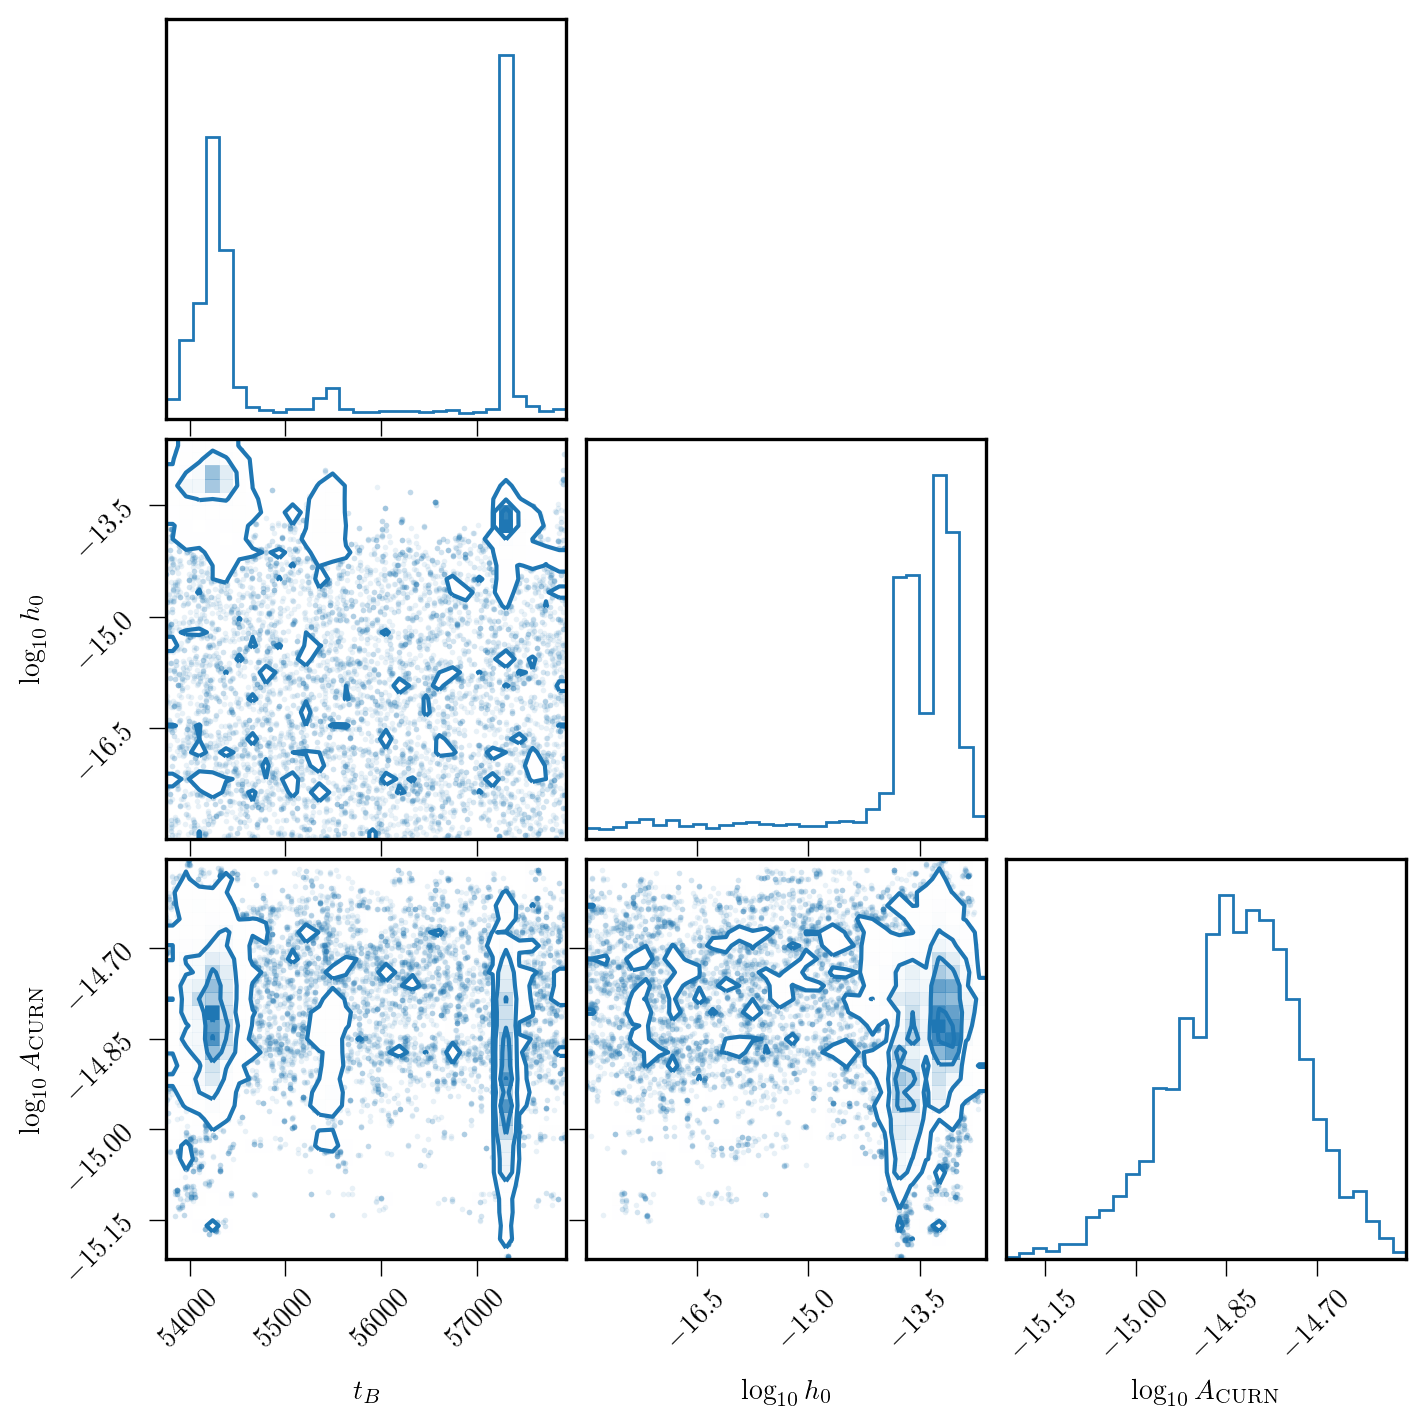

In [253]:
import corner
plt.rcParams.update(params)
param_names = ['bwm_t0', 'bwm_log10_A', 'gw_log10_A']
param_labels = ['$t_B$', '$\log_{10}{h_0}$', '$\log_{10}{A_\mathrm{{CURN}}}$']

data = []
for pname in param_names:
    data.append(core.get_param(pname))
data = np.vstack(np.array(data).T)

print(data.shape)

corner.corner(data, bins=30,labels=param_labels, color='tab:blue')
plt.savefig('/home/nima/nanograv/12p5yr_bwm/paper_plots/detection_corner.pdf',format='pdf')
plt.show()

# Figure 2: PSR-term ULs

In [284]:
def figsize(scale):
    fig_width_pt = 513.17 #469.755                  # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    #golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    golden_mean= 0.3
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size
plt.rcParams.update(plt.rcParamsDefault)

params = {'backend': 'pdf',
        'axes.labelsize': 14,
        'lines.markersize': 4,
        'font.size': 14,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.2,
        'legend.fontsize': 10,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.family': 'serif',
        #'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        'figure.figsize': figsize(2)}

plt.rcParams.update(params)

/home/nima/anaconda3/envs/nano15/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [285]:
data_dir = "/home/nima/nanograv/12p5yr_bwm/paper_data/"

## retrieve UL list from runs using gamma = 5.5
ULvPSR_MAP_neg_ULs = json.load(open(data_dir + 'ULvPSR_MAP_neg.json'))
ULvPSR_MAP_pos_ULs = json.load(open(data_dir + 'ULvPSR_MAP_pos.json'))

## retrieve UL list from runs using gamma = 4.33
ULvPSR_SMBHB_neg_ULs = json.load(open(data_dir + 'ULvPSR_SMBHB_neg.json'))
ULvPSR_SMBHB_pos_ULs = json.load(open(data_dir + 'ULvPSR_SMBHB_pos.json'))

In [ ]:
## Sort pulsars by Tspan so that the 'best' pulsars are displayed first
allpsrs_tspans = [p.toas.max() - p.toas.min() for p in allpsrs]
psr_tspan_isort = np.flip(np.argsort(allpsrs_tspans))


fig, ax = plt.subplots(nrows=1, ncols=1)

for _isort_idx, ii_psr in enumerate(psr_tspan_isort):
    psr = allpsrs[ii_psr]
    
    neg_MAP_UL95 = ULvPSR_MAP_neg_ULs[psr.name]
    pos_MAP_UL95 = ULvPSR_MAP_pos_ULs[psr.name]
    
    neg_SMBHB_UL95 = ULvPSR_SMBHB_neg_ULs[psr.name]
    pos_SMBHB_UL95 = ULvPSR_SMBHB_pos_ULs[psr.name]
    
    neg_errcont = ax.scatter(_isort_idx*2 - 0.6, neg_MAP_UL95, marker='o', color='tab:blue', label='Negatively-signed Memory [$\gamma_{\mathrm{MAP} = 5.5$]')
    pos_errcont = ax.scatter(_isort_idx*2 -0.4, pos_MAP_UL95, marker='o', color='tab:red', label='Positively-signed Memory [$\gamma_{\mathrm{MAP} = 5.5$]')
    
    neg_errcont_433 = ax.scatter(_isort_idx*2 + 0.4, neg_SMBHB_UL95, marker='x',color='tab:blue', label='Negatively-signed Memory [$\gamma_{\mathrm{SMBHB} = 4.33$]')
    pos_errcont_433 = ax.scatter(_isort_idx*2 + 0.6, pos_SMBHB_UL95, marker='x',color='tab:red', label='Positively-signed Memory [$\gamma_{\mathrm{SMBHB} = 4.33$]')

    ax.set_xticks(2*np.arange(len(allpsrs)))
ax.set_xticklabels([allpsrs[_].name for _ in psr_tspan_isort],rotation=85)

ax.set_ylim(bottom=-14, top=-11.5)
ax.grid()
ax.legend(handles=[neg_errcont, pos_errcont, neg_errcont_433, pos_errcont_433], labels = ["Negatively-signed Memory [$\gamma_{\mathrm{CURN}} = 5.5$]", "Positively-signed Memory [$\gamma_{\mathrm{CURN}} = 5.5$]", "Negatively-signed Memory [$\gamma_{\mathrm{CURN}} = 4.33$]", 'Positively-signed Memory [$\gamma_{\mathrm{CURN}} = 4.33$]'])

plt.title("Pulsar Term Strain 95\% Upper Limits")
#plt.subplots_adjust(bottom=0.15)
plt.savefig('/home/nima/nanograv/12p5yr_bwm/paper_plots/psrterm_ULs_combined.pdf', format = 'pdf', bbox_inches='tight')
plt.show()

# Figure 3: ULvSky

In [52]:
# these were combined separately
# we'll just generate the three 
nside=8
npix = hp.nside2npix(nside)
nano12_psrlocs = []
for p in allpsrs:
    theta, phi = hp.vec2ang(p.pos)
    psrloc=[phi[0], np.cos(theta[0])]
    
    nano12_psrlocs.append(psrloc)


nano12_psrlocs = np.array(nano12_psrlocs)

ULvSky_MAP_dir = '/home/nima/nanograv/12p5yr_bwm/paper_data/ULvSky_MAP.json'
ULvSky_SMBHB_dir = '/home/nima/nanograv/12p5yr_bwm/paper_data/ULvSky_SMBHB.json'

ULvSky_MAP_dict = json.load(open(ULvSky_MAP_dir))
ULvSky_SMBHB_dict = json.load(open(ULvSky_SMBHB_dir))

ULvSky_MAP_skymap = np.zeros(npix)
ULvSky_SMBHB_skymap = np.zeros(npix)

for ii in range(npix):
    ULvSky_MAP_skymap[ii] = ULvSky_MAP_dict[str(ii)]
    ULvSky_SMBHB_skymap[ii] = ULvSky_SMBHB_dict[str(ii)]

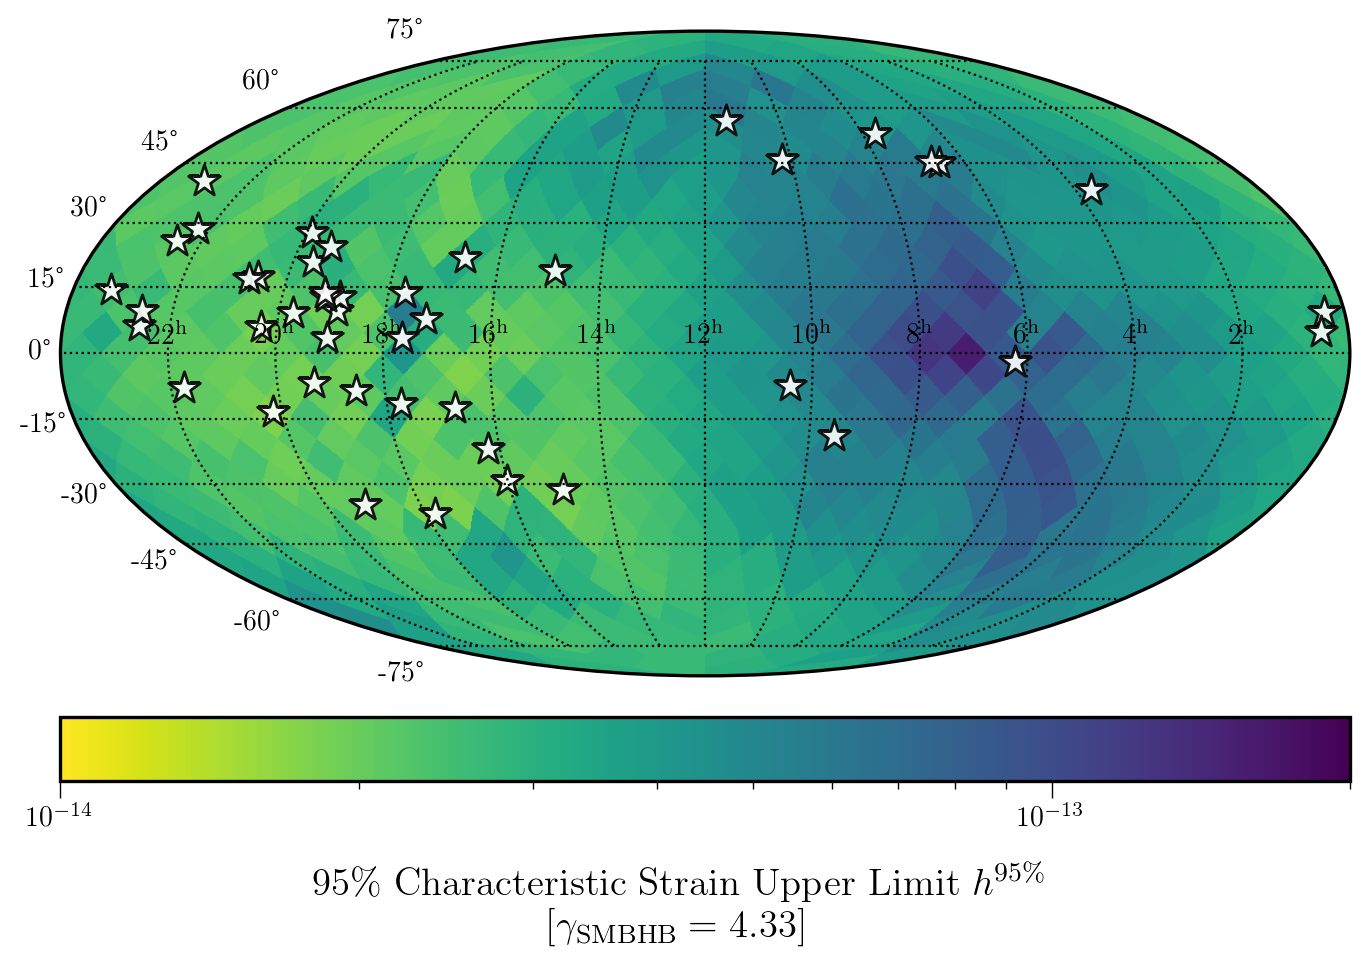

In [53]:
zmin = 1e-14
zmax = 2e-13

norm=LogNorm(vmin=zmin, vmax=zmax)

plt.close('all')
plt.figure(0, figsize=(7, 5))
ax = plt.subplot(111, projection='astro mollweide', )
ax.grid()
#spt.outline_text(ax)

spt.healpix_heatmap(ULvSky_MAP_skymap, cmap='viridis_r', norm=LogNorm(vmin=zmin, vmax=zmax),)

ax.scatter(nano12_psrlocs[:,0], nano12_psrlocs[:,1], 12**2,
          marker='*', facecolor='w', edgecolors='k', alpha=0.9)

cbar = plt.colorbar(orientation='horizontal', pad=0.05)
plt.suptitle('95\% Characteristic Strain Upper Limit $h^{95\%}$\n$[\gamma_{\mathrm{SMBHB}} = 4.33]$', y=0.01, fontweight='heavy', fontsize=14,)
#plt.suptitle(, y=0.05)
plt.grid(linestyle='dotted', color='k')
plt.tight_layout()
plt.show()

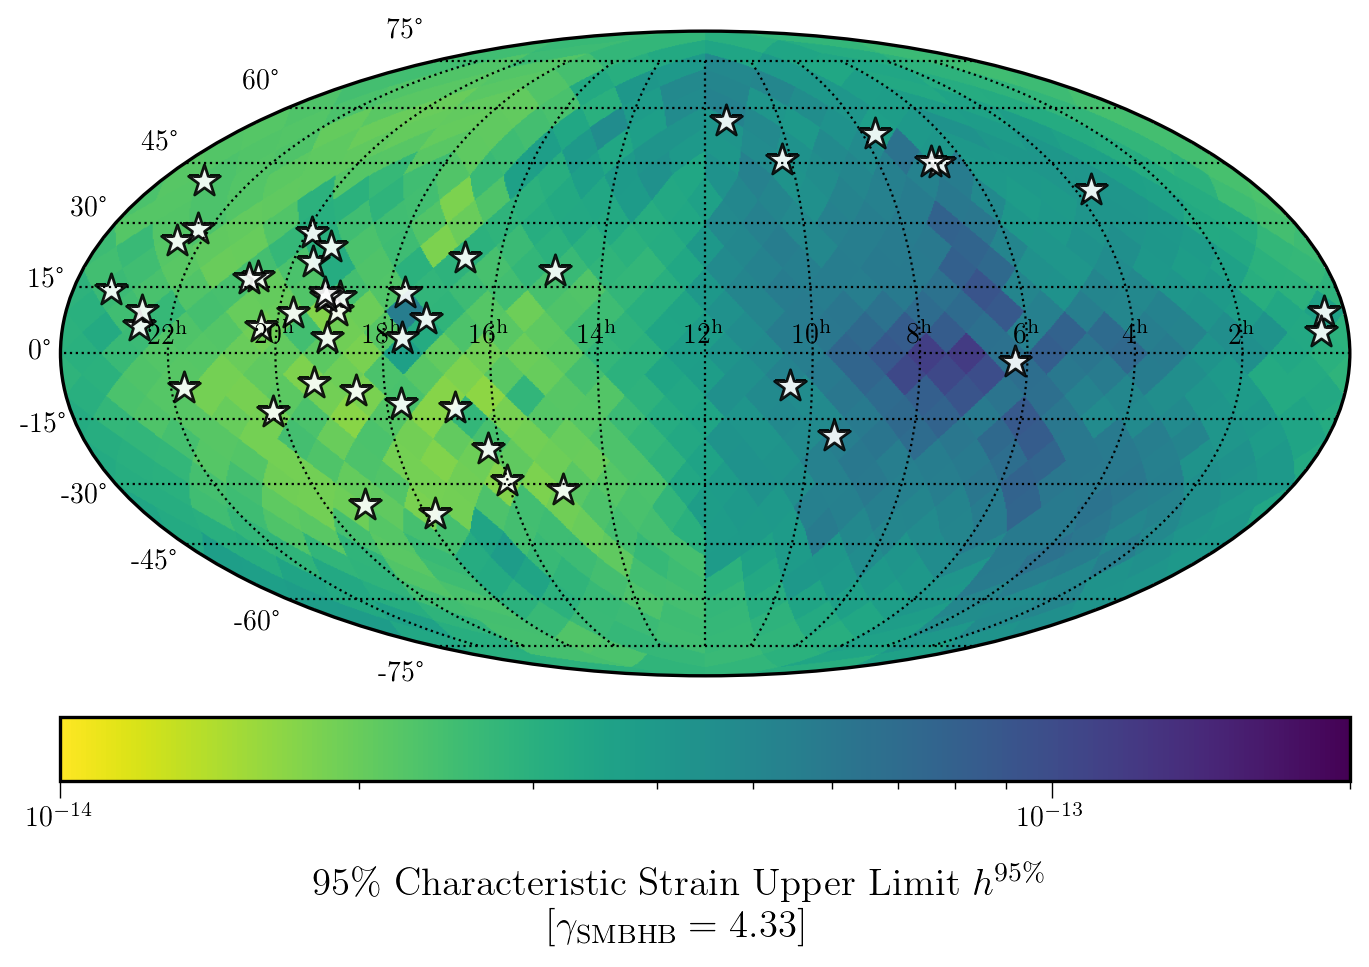

In [54]:
zmin = 1e-14
zmax = 2e-13

norm=LogNorm(vmin=zmin, vmax=zmax)

plt.close('all')
plt.figure(0, figsize=(7, 5))
ax = plt.subplot(111, projection='astro mollweide', )
ax.grid()
#spt.outline_text(ax)

spt.healpix_heatmap(ULvSky_SMBHB_skymap, cmap='viridis_r', norm=LogNorm(vmin=zmin, vmax=zmax),)

ax.scatter(nano12_psrlocs[:,0], nano12_psrlocs[:,1], 12**2,
          marker='*', facecolor='w', edgecolors='k', alpha=0.9)

cbar = plt.colorbar(orientation='horizontal', pad=0.05)
plt.suptitle('95\% Characteristic Strain Upper Limit $h^{95\%}$\n$[\gamma_{\mathrm{SMBHB}} = 4.33]$', y=0.01, fontweight='heavy', fontsize=14,)
#plt.suptitle(, y=0.05)
plt.grid(linestyle='dotted', color='k')
plt.tight_layout()
plt.show()

3.790039932548371e-14 -1.6954835087144215e-14


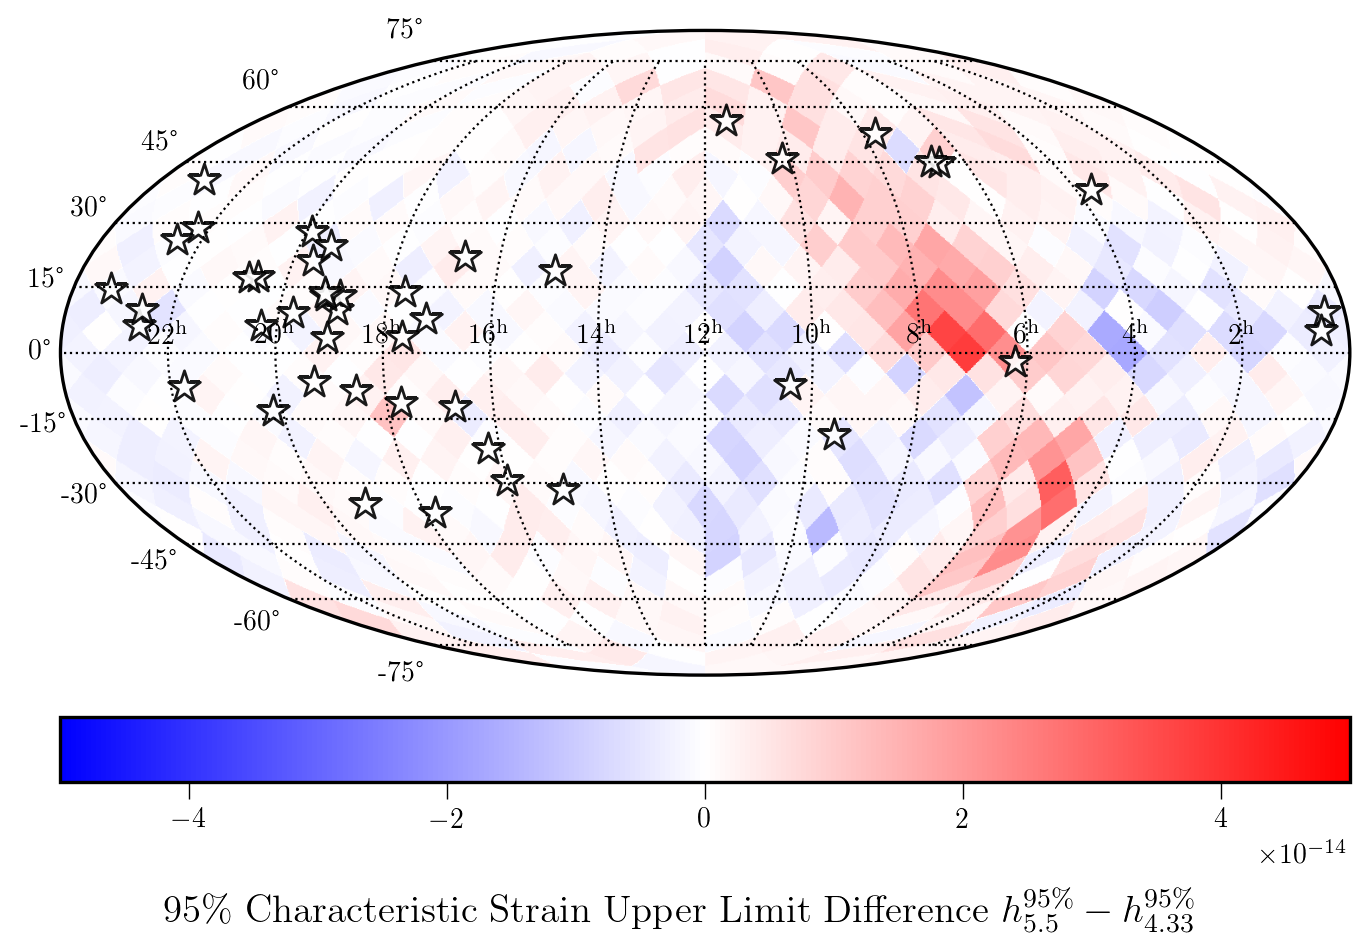

In [55]:
diff = ULvSky_MAP_skymap - ULvSky_SMBHB_skymap

plt.close('all')
plt.figure(0, figsize=(7, 5))
ax = plt.subplot(111, projection='astro mollweide', )
ax.grid()
#spt.outline_text(ax)

print(max(diff), min(diff))

spt.healpix_heatmap(diff, cmap='bwr', norm=Normalize(vmin=-5e-14, vmax=5e-14),)

ax.scatter(nano12_psrlocs[:,0], nano12_psrlocs[:,1], 12**2,
          marker='*', facecolor='w', edgecolors='k', alpha=0.9)

cbar = plt.colorbar(orientation='horizontal', pad=0.05)
plt.suptitle('95\% Characteristic Strain Upper Limit Difference $h^{95\%}_{5.5} - h^{95\%}_{4.33}$', y=0.01, fontweight='heavy', fontsize=14,)
#plt.suptitle(, y=0.05)
plt.grid(linestyle='dotted', color='k')
plt.tight_layout()
plt.show()


# Figure 4: ULvT

In [246]:
ULvT_noCURN_dir = '/home/nima/nanograv/12p5yr_bwm/paper_data/ULvT_noCURN.json'
ULvT_MAP_dir = '/home/nima/nanograv/12p5yr_bwm/paper_data/ULvT_MAP.json'
ULvT_SMBHB_dir = '/home/nima/nanograv/12p5yr_bwm/paper_data/ULvT_SMBHB.json'

with open(ULvT_noCURN_dir, 'rb') as fin:
    noCURN_UL_dict = json.load(fin)

with open(ULvT_MAP_dir, 'rb') as fin:
    ULvT_MAP_UL_dict = json.load(fin)
    
with open(ULvT_SMBHB_dir, 'rb') as fin:
    ULvT_SMBHB_UL_dict = json.load(fin)
    
nano12_Ts = np.linspace(53216.13175403865+180, 57933.45642396011-180, 157)

noCURN_ULs = []
ULvT_MAP_ULs = []
ULvT_SMBHB_ULs = []

for key in noCURN_UL_dict.keys():
    noCURN_ULs.append(noCURN_UL_dict[key])
    ULvT_MAP_ULs.append(ULvT_MAP_UL_dict[key])
    ULvT_SMBHB_ULs.append(ULvT_SMBHB_UL_dict[key])
    


Green line that represents the 11yr results, visit https://github.com/paulthebaker/nano11_bwm to get the data. We will reference the 11yr results in other places, they all come from here

In [250]:
key = 'DE436'
T11 = [x[0] for x in ULmarg[key]]
# T11 = Time(T11, format='mjd').decimalyear


# use BayesEphem for Rate ULs
key = 'DE436_BE'
UL_11 = np.array(ULmarg[key]).T

dT_11 = np.mean(np.diff(UL_11[0]))/365.25
hsort_11 = np.sort(UL_11[1])
Ns_11 = np.arange(len(hsort_11))+1

In [251]:
def figsize(scale):
    fig_width_pt = 513.17 #469.755                  # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    #golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    golden_mean= 0.3333
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size
plt.rcParams.update(plt.rcParamsDefault)

params = {'backend': 'pdf',
        'axes.labelsize': 10,
        'lines.markersize': 4,
        'font.size': 10,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.2,
        'legend.fontsize': 7,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'savefig.dpi':400,
        'path.simplify':True,
        'font.family': 'serif',
        #'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        'figure.figsize': figsize(0.98)}

plt.rcParams.update(params)

/home/nima/anaconda3/envs/nano15/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


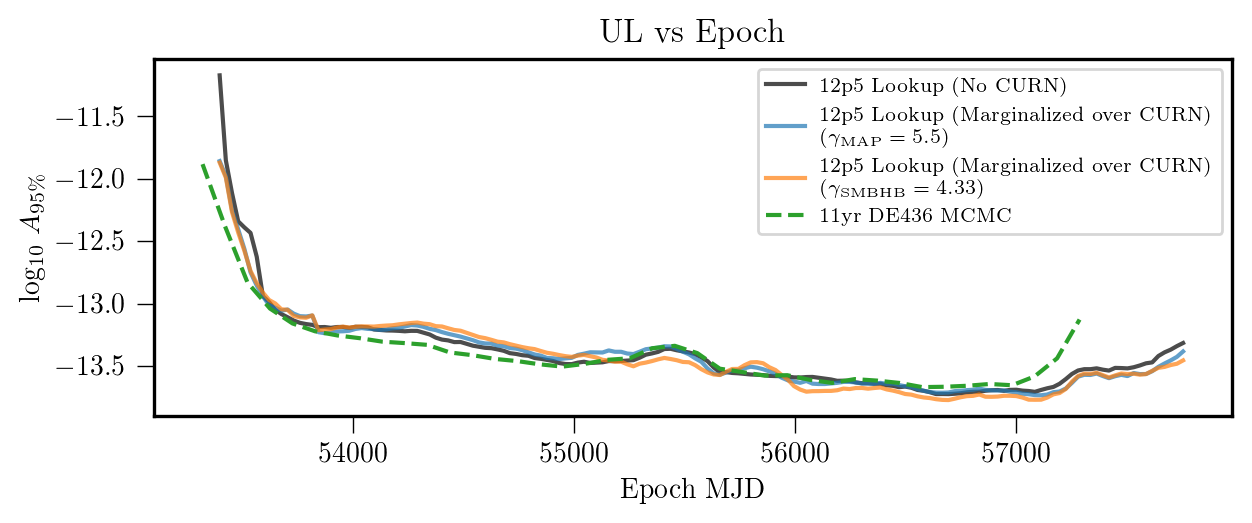

In [252]:
plt.plot(nano12_Ts, noCURN_ULs, label='12p5 Lookup (No CURN)', color = 'black', alpha=0.7)
plt.plot(nano12_Ts, ULvT_MAP_ULs, label='12p5 Lookup (Marginalized over CURN)\n$(\gamma_\mathrm{MAP}=5.5)$', color='tab:blue',alpha=0.7)
plt.plot(nano12_Ts, ULvT_SMBHB_ULs, label='12p5 Lookup (Marginalized over CURN)\n$(\gamma_\mathrm{SMBHB}=4.33)$', color='tab:orange', alpha=0.7)
plt.plot(T11, np.log10(ULs_436), label='11yr DE436 MCMC',ls='--', color = 'tab:green')

plt.legend()
plt.title("UL vs Epoch")
plt.ylabel("log$_{10}$ $A_{95\%}$")
plt.xlabel('Epoch MJD')
plt.legend(loc='upper right')
plt.savefig('/home/nima/nanograv/12p5yr_bwm/paper_plots/ULvT',format='pdf')
plt.show()

# Figure 5: UL Rates

Earth-term Rates

In [186]:
islo_rates = np.load("/home/nima/nanograv/11yr/postproc_nb/11yr_bwm_paper_data/rate_vs_strain_Sesana_finegrain_10.npy").T

In [187]:
earth_noCURN_hsort = 10**np.sort(noCURN_ULs)
earth_MAP_hsort = 10**np.sort(ULvT_MAP_ULs)
earth_SMBHB_hsort = 10**np.sort(ULvT_SMBHB_ULs)

dTs = np.mean(np.diff(nano12_Ts)) * np.ones(len(earth_noCURN_hsort))/365.25

Tsort = np.cumsum(dTs)

Pulsar-term Rates

In [188]:
def process_parfile(parfile):
#     print(parfile)
    with open(parfile, 'r') as f:
        lines = f.read().split('\n')
    pardict = {}
    for line in lines:
        if line != '':
#             print(line)
            key, np_args = line.split(';')
            start, stop, num = np.float64(np_args.split(','))

            pardict[key] = np.linspace(start, stop, int(num))

    return pardict

In [189]:
nano11_psr_file = "/home/nima/nanograv/12p5yr_bwm/paper_data/11yr_34.txt"
with open(nano11_psr_file, 'r') as f:
    nano11_psrlist = f.read().split('\n')[:-1]

print(nano11_psrlist)

['B1855+09', 'B1937+21', 'B1953+29', 'J1713+0747', 'J1909-3744', 'J2317+1439', 'J1600-3053', 'J1640+2224', 'J1614-2230', 'J1918-0642', 'J2043+1711', 'J0030+0451', 'J1744-1134', 'J1741+1351', 'J0613-0200', 'J2010-1323', 'J1455-3330', 'J0645+5158', 'J1012+5307', 'J2145-0750', 'J1024-0719', 'J1738+0333', 'J1910+1256', 'J1923+2515', 'J1853+1303', 'J1944+0907', 'J2017+0603', 'J1643-1224', 'J0340+4130', 'J2214+3000', 'J1903+0327', 'J1747-4036', 'J2302+4442', 'J0023+0923']


In [221]:
psr_noCURN_lookup = "/home/nima/nanograv/12p5yr_bwm/lookup_tables/"
psr_SMBHB_lookup = "/home/nima/nanograv/12p5yr_bwm/lookup_tables_det_RN/"
psr_MAP_lookup = "/home/nima/nanograv/12p5yr_bwm/lookup_tables_crn_marg_det_RN_mapgamma/"

psr_noCURN_hs = []
psr_SMBHB_hs = []
psr_MAP_hs = []

psr_noCURN_dTs = []
psr_SMBHB_dTs = []
psr_MAP_dTs = []

# bprint(len(allpsrs))

for psr in allpsrs:

#     print(psr.name)

    parfile_suffix = '{}/pars.txt'.format(psr.name)
    resampled_suffix = '{}/resampled_epochs/sign_marged_epoch_UL95s.txt'.format(psr.name)

    ## no-CURN processing
    noCURN_parfile = psr_noCURN_lookup + parfile_suffix
    noCURN_pardict = process_parfile(noCURN_parfile)
    noCURN_hs = np.loadtxt(psr_noCURN_lookup + resampled_suffix)
    noCURN_dTs = np.ones(len(noCURN_hs)) * np.mean(np.diff(noCURN_pardict['ramp_t0']))

    for ii in range(len(noCURN_hs)):
        psr_noCURN_hs.append(noCURN_hs[ii])
        psr_noCURN_dTs.append(noCURN_dTs[ii]/365.25)


    ## SMBHB processing
    SMBHB_parfile = psr_SMBHB_lookup + parfile_suffix
    SMBHB_pardict = process_parfile(SMBHB_parfile)
    SMBHB_hs = np.loadtxt(psr_SMBHB_lookup + resampled_suffix)
    SMBHB_dTs = np.ones(len(SMBHB_hs)) * np.mean(np.diff(SMBHB_pardict['ramp_t0']))

    for ii in range(len(SMBHB_hs)):
        psr_SMBHB_hs.append(SMBHB_hs[ii])
        psr_SMBHB_dTs.append(SMBHB_dTs[ii]/365.25)


    ## MAP processing
    MAP_parfile = psr_MAP_lookup + parfile_suffix
    MAP_pardict = process_parfile(MAP_parfile)
    MAP_hs = np.loadtxt(psr_MAP_lookup + resampled_suffix)
    MAP_dTs = np.ones(len(MAP_hs)) * np.mean(np.diff(MAP_pardict['ramp_t0']))

    for ii in range(len(MAP_hs)):
        psr_MAP_hs.append(MAP_hs[ii])
        psr_MAP_dTs.append(MAP_dTs[ii]/365.25)

## Now we need to sort hs and cumulatively sum dTs

psr_noCURN_isort = np.argsort(psr_noCURN_hs)
psr_SMBHB_isort = np.argsort(psr_SMBHB_hs)
psr_MAP_isort = np.argsort(psr_MAP_hs)


    
psr_noCURN_dTsort = []
psr_noCURN_hsort = []

psr_SMBHB_dTsort = []
psr_SMBHB_hsort = []

psr_MAP_dTsort = []
psr_MAP_hsort = []


for sorted_idx in psr_noCURN_isort:
    psr_noCURN_dTsort.append(psr_noCURN_dTs[sorted_idx])
    psr_noCURN_hsort.append(psr_noCURN_hs[sorted_idx])

for sorted_idx in psr_SMBHB_isort:
    psr_SMBHB_dTsort.append(psr_SMBHB_dTs[sorted_idx])
    psr_SMBHB_hsort.append(psr_SMBHB_hs[sorted_idx])
    
for sorted_idx in psr_MAP_isort:
    psr_MAP_dTsort.append(psr_MAP_dTs[sorted_idx])
    psr_MAP_hsort.append(psr_MAP_hs[sorted_idx])

Let's grab the 11yr data as well

In [227]:
T11 = [x[0] for x in ULmarg[key]]
T11 = Time(T11, format='mjd').decimalyear


# use BayesEphem for Rate ULs
key = 'DE436_BE'
UL_11 = np.array(ULmarg[key]).T

dT_11 = np.mean(np.diff(UL_11[0]))/365.25
hsort_11 = np.sort(UL_11[1])
Ns_11 = np.arange(len(hsort_11))+1


In [228]:
ng11_psr_UL_dict = {}
nano11yr_psrlist = np.loadtxt("/home/nima/nanograv/nano11_bwm/postproc_nb/11yr_bwm_paper_data/11yr_34.txt", dtype=str)
for psrname in nano11yr_psrlist:
    psr_ul_data = "/home/nima/nanograv/nano11_bwm/postproc_nb/11yr_bwm_paper_data/sngl_runs/ULvT_{}.dat".format(psrname)
    psr_uls = np.loadtxt(psr_ul_data)
    ng11_psr_UL_dict[psrname] = psr_uls

rescale = np.pi

sngl_ULs = []  # psr term only
for _,uls,_ in ng11_psr_UL_dict.values():
    sngl_ULs = np.hstack([sngl_ULs, uls])

    
J1713_opt = np.loadtxt("/home/nima/nanograv/nano11_bwm/postproc_nb/11yr_bwm_paper_data/sngl_runs/ULvT_J1713+0747.dat")
    
dT_psr = np.mean(np.diff(J1713_opt[0]))/365.25
hsort_psr = np.sort(sngl_ULs) * rescale
Ns_psr = np.arange(len(hsort_psr)) + 1

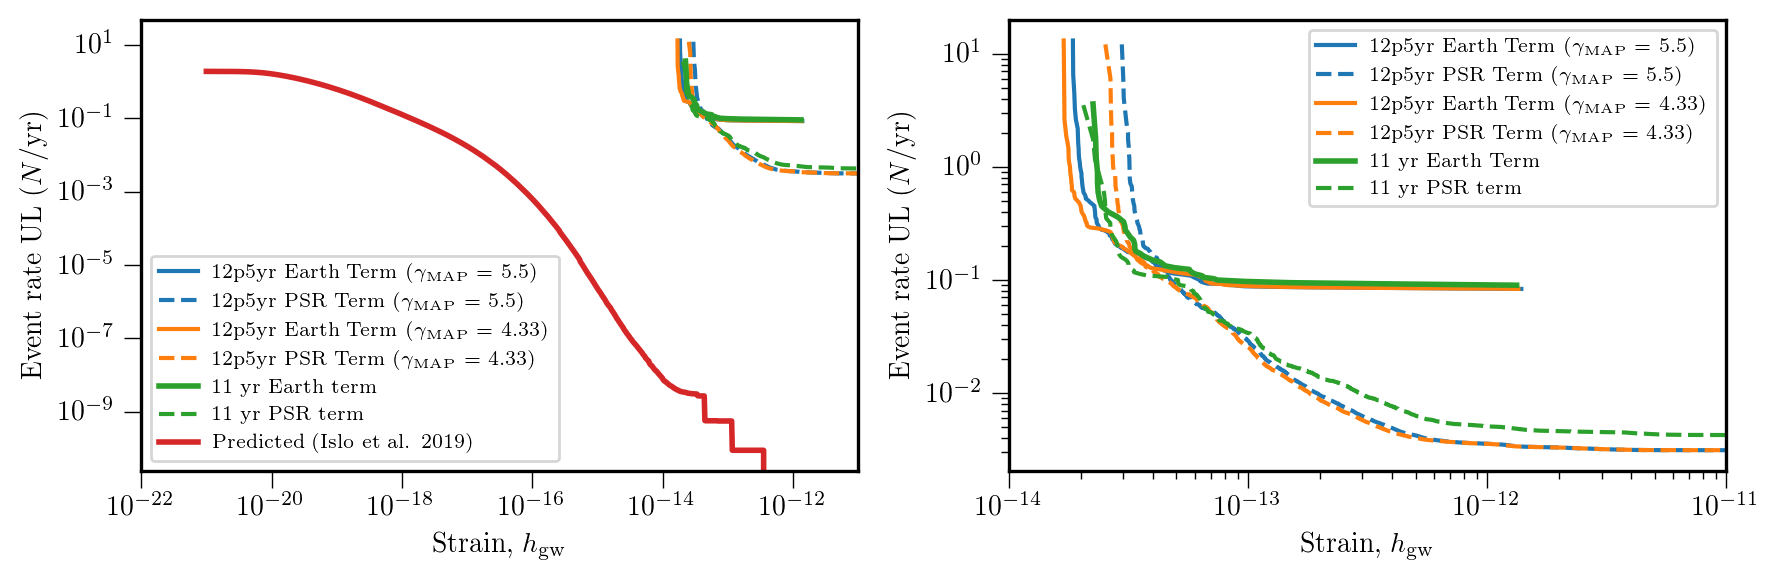

In [237]:
plt.close()
wid = 2
fig = plt.figure(figsize=(9,3))
ax1, ax2 = fig.subplots(1,2)

ax1.plot(earth_MAP_hsort, 1/(Tsort), color='tab:blue', label='12p5yr Earth Term ($\gamma_\mathrm{MAP}$ = 5.5)')
ax1.plot(np.pi*10**np.array(psr_MAP_hsort), 1/np.cumsum(psr_MAP_dTsort), ls = '--', color='tab:blue', label='12p5yr PSR Term ($\gamma_\mathrm{MAP}$ = 5.5)')
ax1.plot(earth_SMBHB_hsort, 1/(Tsort), color='tab:orange', label='12p5yr Earth Term ($\gamma_\mathrm{MAP}$ = 4.33)')
ax1.plot(np.pi*10**np.array(psr_SMBHB_hsort), 1/np.cumsum(psr_SMBHB_dTsort), ls = '--', color='tab:orange', label='12p5yr PSR Term ($\gamma_\mathrm{MAP}$ = 4.33)')
ax1.plot(hsort_11, 1/(Ns_11*dT_11), color='tab:green', lw=wid, label='11 yr Earth term')
ax1.plot(hsort_psr, 1/(Ns_psr * dT_psr), color = 'tab:green', ls = '--', label='11 yr PSR term')
ax1.plot(*islo_rates, color='tab:red', lw=wid, label='Predicted (Islo et al. 2019)')


ax2.plot(earth_MAP_hsort, 1/(Tsort), color='tab:blue', label='12p5yr Earth Term ($\gamma_\mathrm{MAP}$ = 5.5)')
ax2.plot(np.pi*10**np.array(psr_MAP_hsort), 1/np.cumsum(psr_MAP_dTsort), ls = '--', color='tab:blue', label='12p5yr PSR Term ($\gamma_\mathrm{MAP}$ = 5.5)')
ax2.plot(earth_SMBHB_hsort, 1/(Tsort), color='tab:orange', label='12p5yr Earth Term ($\gamma_\mathrm{MAP}$ = 4.33)')
ax2.plot(np.pi*10**np.array(psr_SMBHB_hsort), 1/np.cumsum(psr_SMBHB_dTsort), ls = '--', color='tab:orange', label='12p5yr PSR Term ($\gamma_\mathrm{MAP}$ = 4.33)')
# ax2.plot(earth_noCURN_hsort, 1/(Tsort), color='black', label='12p5yr Earth Term (no CURN)')
# ax2.plot(*islo_rates, color='tab:red', lw=wid, label='predicted rate')
# ax2.plot(np.pi*10**np.array(psr_noCURN_hsort), 1/np.cumsum(psr_noCURN_dTsort), ls = '--', color='black', label='12p5yr PSR Term (no CURN)')
ax2.plot(hsort_11, 1/(Ns_11*dT_11), color='tab:green', lw=wid, label='11 yr Earth Term')
ax2.plot(hsort_psr, 1/(Ns_psr * dT_psr), color = 'tab:green', ls='--', label='11 yr PSR term')


ax2.plot()
for ax in fig.axes:
    ax.set_xlabel('Strain, $h_\mathrm{gw}$')
    ax.set_ylabel('Event rate UL ($N$/yr)')
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.legend()

ax1.set_xlim([1e-22, 1e-11])
ax2.set_xlim([1e-14, 1e-11])

plt.tight_layout()
plt.savefig('/home/nima/nanograv/12p5yr_bwm/paper_plots/UL_rate.pdf')
plt.show()